### PCA

##### 피처추출
- 기존 피처를 압축해서 **저차원의 중요 피처로 압축해 추출**하는 것
- 기존 피처가 인지하기 어려웠던 잠재적 요소를 추출
- 많은 차원을 가진 이미지나 텍스트에서 자주 이용됨
- overfitting의 영향력이 작아져서 이미지 분류와 같은 문제에서 원본 성능보다 나은 성능을 이끌어 낼 수 있음  

##### PCA
- 피처추출의 한 종류, 대표적인 차원축소기법
- 주성분을 추출해 차원을 축소
- **가장 높은 분산**을 가지는 데이터 축을 PCA의 주성분으로 삼음(분산을 데이터 특성을 가장 잘 나타낸다고 가정)
- PCA의 순서
> 1. 입력데이터의 공분산 행렬 생성
> 2. 공분산행렬의 고유벡터와 고유값을 계산
> 3. 고유값이 가장 큰 순으로 K개만큼 고유벡터를 추출
> 4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해서 새롭게 입력데이터를 변환

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head(3)

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


데이터 시각화

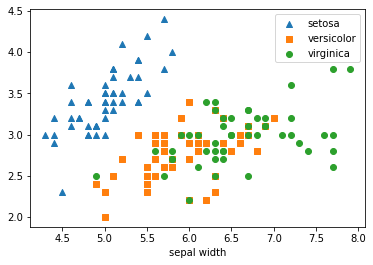

In [2]:
# setosa는 세모 versicolor는 네모, virginica는 동그라미로 표현
# X = sepal_length, y = sepal_width
markers = ['^', 's', 'o']

# setosa의 타겟값은 0 versicolor는 1, virginica는 2 
# 각 타겟 별로 다른 모양으로 scatter플롯 그리기
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker= marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.xlabel('sepal width')
plt.show()

- PCA시에 컬럼의 scale에 영향을 받기 때문에 스케일링이 필수적이다
- StandardScaler를 이용 각 변수들의 분포가 평균 0, 분산 1인 분포로 변경

In [3]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여
# 표준 정규 분포를 가지는 값들로 변경
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [4]:
from sklearn.decomposition import PCA

# n_components => 줄이고자 하는 목표 차원수
pca = PCA(n_components=2)
pca.fit(iris_scaled)

# ndarray로 변환됨
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [5]:
# PCA화된 데이터의 컬럼명 변경
pca_columns = ['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0


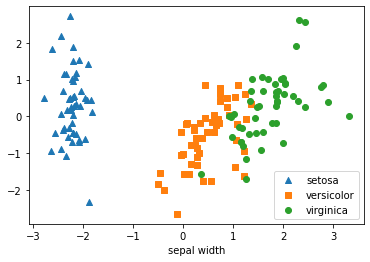

In [6]:
# setosa는 세모 versicolor는 네모, virginica는 동그라미로 표현
# X와 y축은 저차원화 된 2개의 변수
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker= marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.xlabel('sepal width')
plt.show()

- 기존의 변수들로는 구분이 힘들었던 versicolor와 virginica가 어느정도 구분이 됨

In [7]:
# PCA후 각 변수들이 변동에 차지하는 비율
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523]


교차검증을 통해 원본과 PCA후의 변수들의 예측성능 비교

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring = 'accuracy', cv = 3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98039216 0.92156863 0.97916667]
원본 데이터 평균: 0.960375816993464


C:\Users\82109\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [9]:
pca_X = irisDF_pca.drop('target', axis = 1)
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring = 'accuracy', cv = 3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.90196078 0.84313725 0.875     ]
PCA 변환 데이터 평균: 0.8733660130718954


- 차원이 적어진 수만큼 정확도가 떨어졌음을 알 수 있음
- 그래도 2개의 변수만으로도 10%의 정확도 하락이면 나름 정확한 편

#### 변수가 더 많은 데이터 사용
- 더 많은 변수에서 PCA의 성능을 살펴봄

In [10]:
import pandas as pd 

df = pd.read_excel('credit_card.xls', sheet_name = 'Data', header=1).iloc[:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [11]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis = 1)

In [12]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(23)
memory usage: 5.3 MB


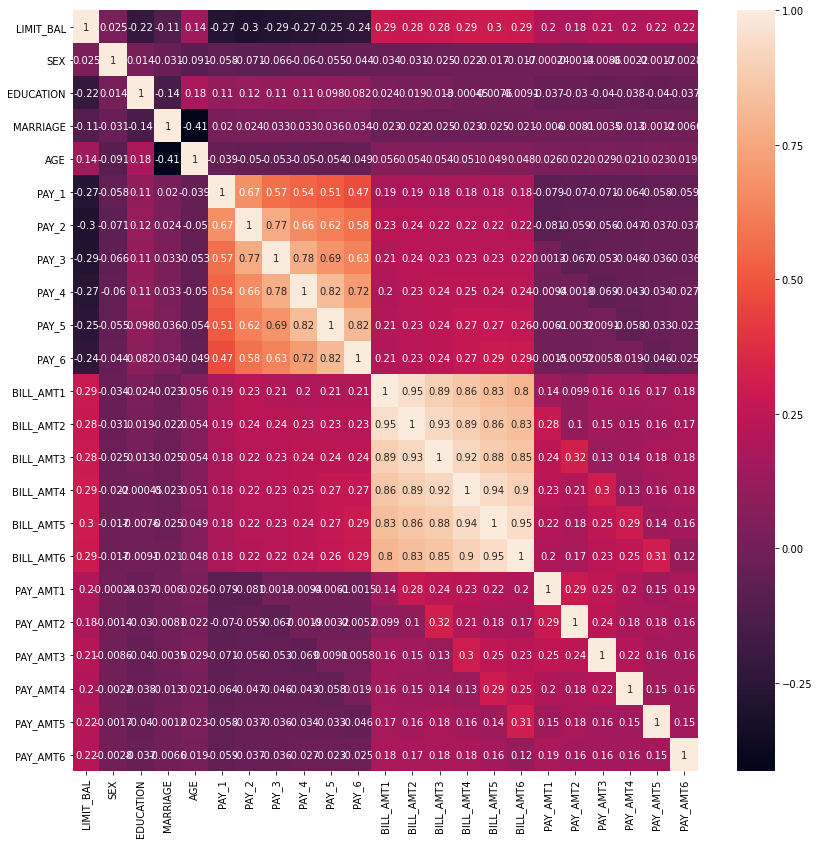

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot = True)
plt.show()

- BILL_AMT1~6 변수들이 서로 상당히 높은 상관관계를 가지고 있음
- 상관관계가 높은 변수들만을 묶어 PCA실행

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상속성명:' ,cols_bill)

# 2개의 PCA속성을 가진 PCA객체를 생성하고 explained_varience_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_)

대상속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [5.43349627 0.3059304 ]


**??**  
첫번째 변수(PCA 축)만으로도 충분히 설명력있는 예측이 가능

원본데이터를 이용해 성능측정

In [15]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))


CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


PCA를 적용한 후 성능측정

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7905 0.7963 0.8033]
PCA 변환 데이터 셋 평균 정확도:0.7967


- 정확도는 원본데이터 보다 0.02정도 줄었으나 1/4정도의 변수만으로 이정도 성능을 낼 수 있음(PCA 압축능력 확인가능)
- 이 때문에 데이터를 쉽게 인지 가능
- 컴퓨터 비전(ex 얼굴인식에 사용되는 Eigen-face => 원본얼굴이미지를 변환해 사용)에 사용되기도 함